<h1>IMPORTING THE DEPENDENCIES</h1>

In [1]:
import numpy as np
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import seaborn as sns

<h1>DATA COLLECTION & PROCESSING</h1>

In [2]:
data = pd.read_csv('C:/irisflowerclassification/IRIS.csv')

In [3]:
data.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [4]:
#first thing is to check the number of rows and columns 
data.shape

(150, 5)

In [5]:
data.info()
#To display basic info about datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#So after checking the info some values are missing so let us check the missing values in each column
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
#To display number of samples on each class
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<h1>HANDLING THE MISSING VALUES</h1>

In [10]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [11]:
#Looking at the result we can see we don't have any null values so we can move to the next step

<h1>DATA ANALYSIS</h1>

In [12]:
#Getting some statistical measures about the data
data.describe()

sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

<h1>DATA VISUALIZATION</h1>

<Axes: >

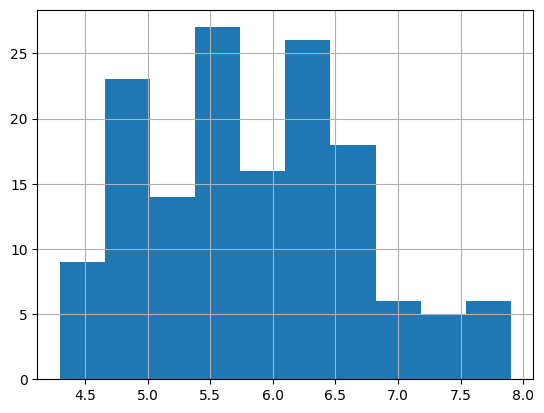

In [13]:
data['sepal_length'].hist()

<Axes: >

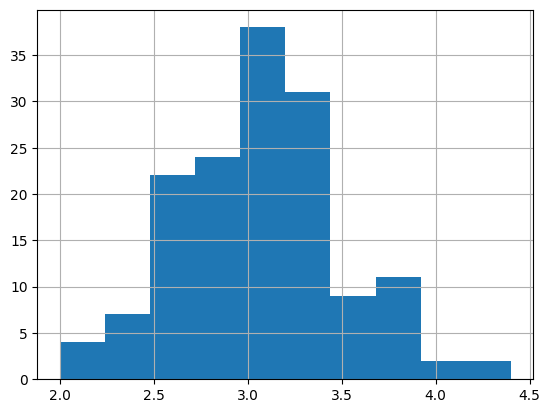

In [14]:
data['sepal_width'].hist() #Normal distribution meaning the model can quickly learn from data


<Axes: >

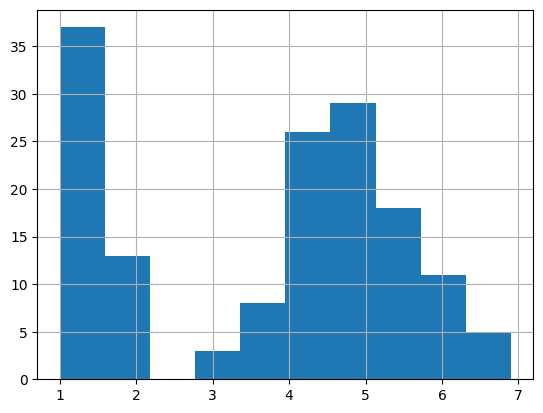

In [15]:
data['petal_length'].hist()

<Axes: >

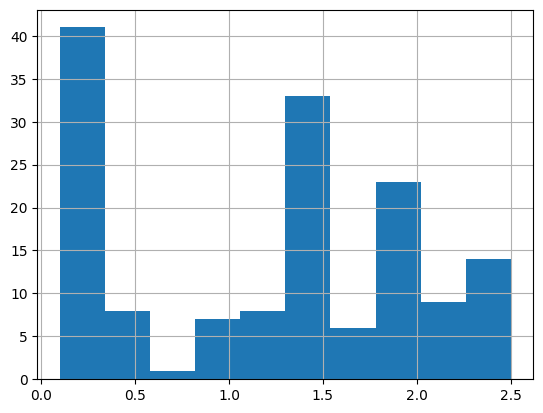

In [16]:
data['petal_width'].hist()

In [17]:
#SCATTERPLOT 

In [18]:
data['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [19]:
colors = ['red','orange','blue']
species = ['Iris-setosa', 'Iris-versicolor' ,'Iris-virginica']

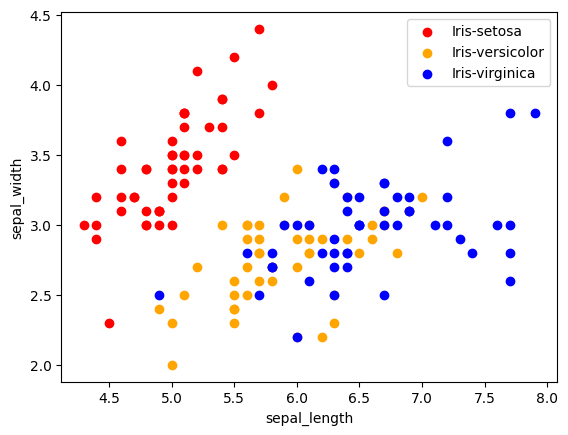

In [29]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['sepal_width'], c=colors[i], label=species[i])
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    plt.legend()

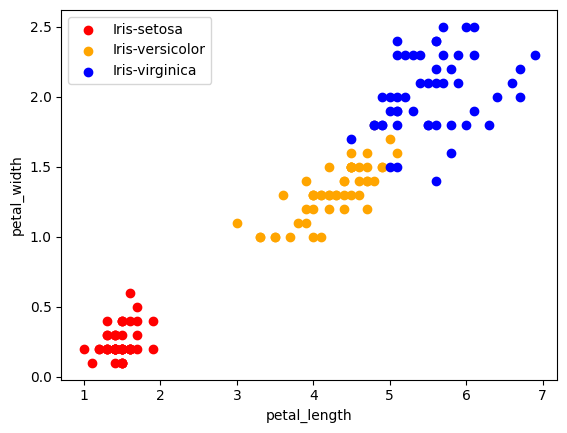

In [30]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['petal_length'], x['petal_width'], c=colors[i], label=species[i])
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.legend()

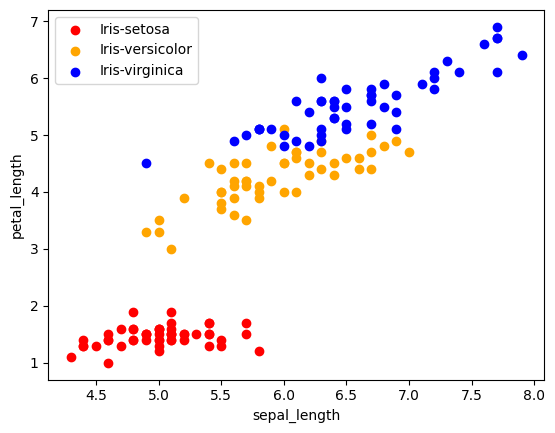

In [31]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_length'], x['petal_length'], c=colors[i], label=species[i])
    plt.xlabel('sepal_length')
    plt.ylabel('petal_length')
    plt.legend()

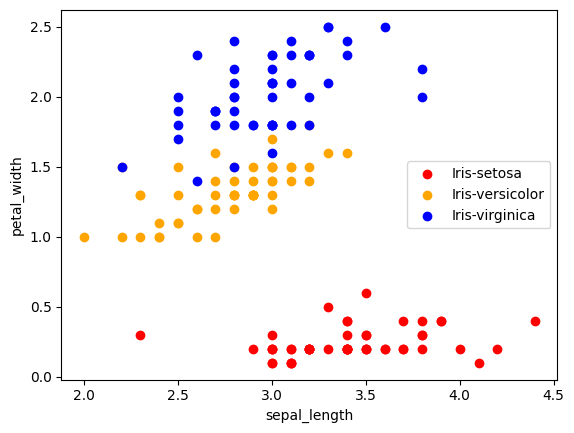

In [32]:
for i in range(3):
    x = data[data['species'] == species[i]]
    plt.scatter(x['sepal_width'], x['petal_width'], c=colors[i], label=species[i])
    plt.xlabel('sepal_length')
    plt.ylabel('petal_width')
    plt.legend()

<h1>COORELATION MATRIX</h1>

In [35]:
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
print(correlation_matrix)

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


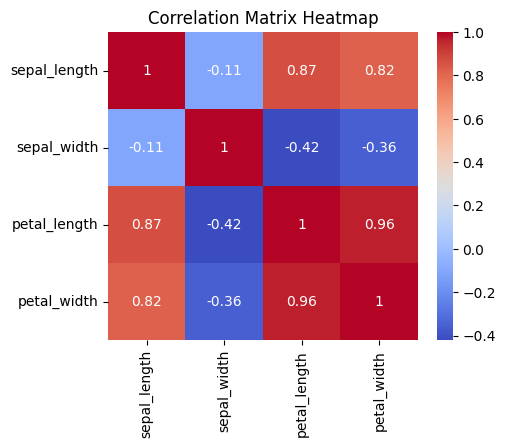

In [39]:

numeric_data = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_data.corr()

# Create a heatmap

fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(corr, annot=True, cmap='coolwarm', ax=ax)

plt.title("Correlation Matrix Heatmap")
plt.show()


<h1>LABEL ENCODER</h1>

In [43]:
from sklearn.preprocessing import LabelEncoder
le =  LabelEncoder()

In [45]:

# Fit and transform the 'species' column
data['species'] = le.fit_transform(data['species'])

# Check the first few rows of the transformed data
data.head()


sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

<h1>MODEL TRAINING</h1>

In [55]:
from sklearn.model_selection import train_test_split
#train - 70%
#test - 30%
X= data.drop(columns=['species'])
Y= data['species']
x_train, x_test , y_train,y_test = train_test_split(X,Y, test_size=0.30 )

In [56]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
model =  LogisticRegression()

In [57]:
#Model Training
model.fit(x_train,y_train)

LogisticRegression()

In [58]:
print("Accuracy: ",model.score(x_test,y_test) * 100)

Accuracy:  97.77777777777777


In [59]:
#K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [60]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [61]:
print("Accuracy: ",model.score(x_test,y_test) * 100)

Accuracy:  97.77777777777777
